In [156]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
from sklearn.metrics import (confusion_matrix,accuracy_score,precision_score,recall_score,f1_score)

In [157]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [158]:
print(f'Image D-Type: {type(x_train)}')
print(f'Image Element D-Type: {type(x_train[0,0,0])}')
print(f'Label Element D-Type: {type(y_train[0])}')

Image D-Type: <class 'numpy.ndarray'>
Image Element D-Type: <class 'numpy.uint8'>
Label Element D-Type: <class 'numpy.uint8'>


In [159]:
print('Train Data:')
print(f'Images: {x_train.shape}')
print(f'Labels: {y_train.shape}')

Train Data:
Images: (60000, 28, 28)
Labels: (60000,)


In [160]:
print('Test Data:') 
print(f'Images: {x_test.shape}')
print(f'Labels: {y_test.shape}')

Test Data:
Images: (10000, 28, 28)
Labels: (10000,)


In [161]:
print('Image Data Range:')
print(f'Min: {x_train.min()}')
print(f'Max: {x_train.max()}')

Image Data Range:
Min: 0
Max: 255


## Images in the training set in grayscale

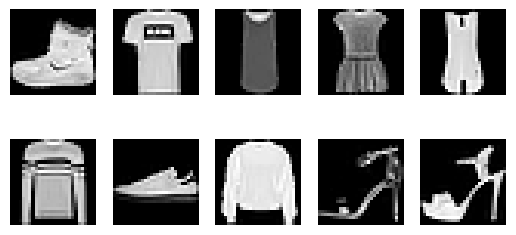

In [162]:
import matplotlib.pyplot as plt
plt.figure
for i in range(10):
    plt.subplot(3, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
plt.show()

In [163]:
unique_labels = set(y_train)
number_classes = len(unique_labels)
print("Number of classes:", number_classes)
print("Unique labels:", unique_labels)

Number of classes: 10
Unique labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


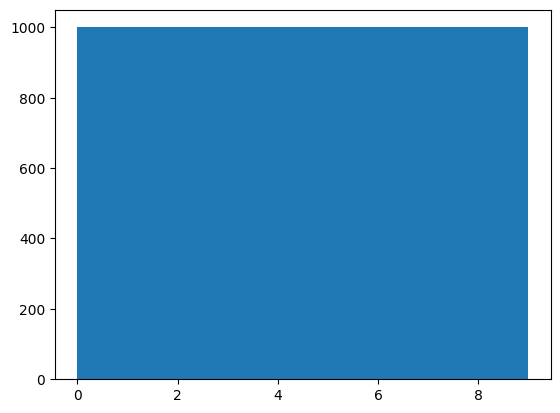

In [164]:
plt.hist(y_test)
plt.show()

Each label in train and test data are equally distributed.

## Reshaping and normalizing data

In [165]:
train_images = x_train.reshape((60000, 28 * 28))
test_images = x_test.reshape((10000, 28 * 28))

train_images = train_images.astype("float32") / 255  
test_images = test_images.astype("float32") / 255



As activation function relu is used.

In [166]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

Adam is selected as the optimizer

In [167]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [168]:
model.fit(train_images, y_train, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.5593 - accuracy: 0.8080
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.4141 - accuracy: 0.8559
Epoch 3/10
469/469 [==============================] - 3s 5ms/step - loss: 0.3742 - accuracy: 0.8670
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.3473 - accuracy: 0.8772
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3291 - accuracy: 0.8813
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3101 - accuracy: 0.8881
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2982 - accuracy: 0.8914
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2855 - accuracy: 0.8955
Epoch 9/10
469/469 [==============================] - 3s 5ms/step - loss: 0.2757 - accuracy: 0.8990
Epoch 10/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2645 - accuracy: 0.9034

In [169]:
test_loss, test_acc = model.evaluate(test_images,  y_test, verbose=2)

print('\n Test accuracy:', test_acc)

313/313 - 1s - loss: 0.3396 - accuracy: 0.8791 - 969ms/epoch - 3ms/step

 Test accuracy: 0.8791000247001648


In [170]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [171]:
y_max_prediction = np.argmax(predictions, axis=1)

confusion matrix 

In [172]:
confusion_matrix(y_test, y_max_prediction)

array([[817,   0,  21,  35,   7,   1, 109,   0,  10,   0],
       [  3, 964,   1,  23,   7,   0,   2,   0,   0,   0],
       [ 12,   0, 774,  12, 146,   0,  55,   0,   1,   0],
       [ 16,   4,  10, 884,  64,   0,  18,   0,   4,   0],
       [  0,   0,  77,  14, 876,   0,  33,   0,   0,   0],
       [  0,   0,   0,   1,   0, 967,   0,  18,   1,  13],
       [115,   0,  91,  40, 110,   0, 637,   0,   7,   0],
       [  0,   0,   0,   0,   0,  26,   0, 943,   0,  31],
       [  5,   0,   6,   4,   6,   8,   4,   4, 963,   0],
       [  0,   0,   0,   0,   0,  10,   1,  23,   0, 966]])

The diagonal elements represent the number of correct predictions for each class and off-diagonal elements represent misclassifications. The high diagonal values shows that the model is performing well.

In [173]:
precision = precision_score(y_test, y_max_prediction , average='weighted')
recall = recall_score(y_test, y_max_prediction, average='weighted')
f1score = f1_score(y_test, y_max_prediction, average='weighted')

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

Precision = 0.8807378230167177
Recall = 0.8791
F1 Score = 0.8786904349716691


In [174]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [179]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

Explore specific examples of incorrect classifications

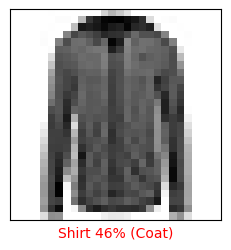

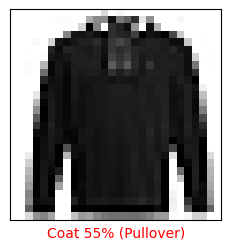

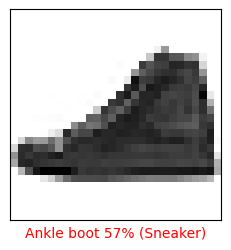

In [183]:
num_examples = len(predictions)
incorrect = []
for i in range(num_examples):
    cal = 100*np.max(predictions[i])
    if(cal<60):
        incorrect.append(i)
arr = [1055, 6404, 6085]
for i in arr:
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], y_test, x_test)
    plt.show()